In [1]:
!pip install scikit-learn==0.24

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1-  Repetindo o que fizemos em aula

In [25]:
peng=sns.load_dataset('penguins')
peng.dropna(inplace=True)
peng.shape

(333, 7)

In [26]:
df=peng.select_dtypes(exclude='O')

In [27]:
df.shape

(333, 4)

In [64]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [28]:
df_pa=StandardScaler().fit_transform(df)

In [29]:
df_pa

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

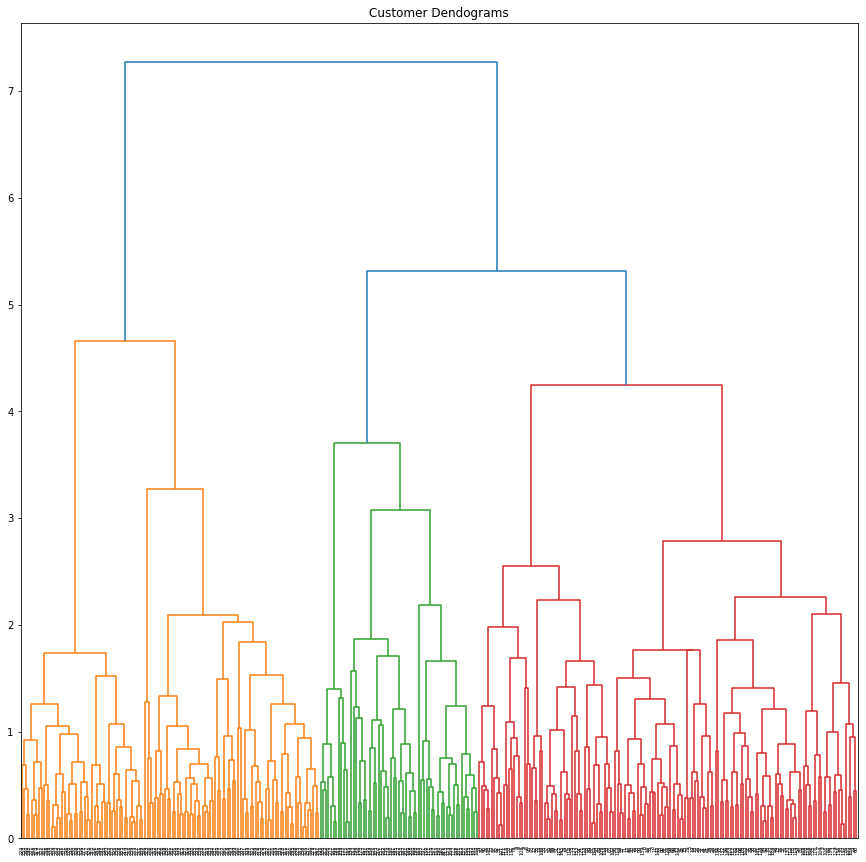

In [30]:
plt.figure(figsize=(15,15))
plt.title('Customer Dendograms')
dend=shc.dendrogram(shc.linkage(df_pa,method='complete'))

## 2- Avaliar os grupos 

In [31]:
clustering = AgglomerativeClustering(n_clusters=3).fit(df_pa)
peng['grupos']=clustering.labels_

In [32]:
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupos
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0


In [35]:
pd.crosstab(peng['species'],peng['grupos'])

grupos,0,1,2
species,,,
Adelie,0,146,0
Chinstrap,0,11,57
Gentoo,119,0,0


Os grupos foram bem definidos apesar da espécie chinstrap ter classificado 11 penguins no grupo 1.

In [39]:
peng.select_dtypes(exclude='O').groupby('grupos').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
grupos,,,,
0,47.568067,14.996639,217.235294,5092.436975
1,39.191720,18.286624,190.038217,3680.095541
2,49.752632,18.601754,197.105263,3810.087719


1. Os penguins da grupo 0 são mais pesados em consideração aos outros e possui a maior nadadeira (barbatanas)
2. Os penguis do grupo 1 possuem algumas caracteristicas bem parecidas com a do grupo 2 (massa,nadadeira,profundidade do bico) a diferença maior entre os dois grupos é o comprimento do bico que no grupo 2 é maior.

## 3- Alterando o agrupamento

In [60]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df_pa)
peng['grupos']=clustering.labels_

In [61]:
pd.crosstab(peng['species'],peng['grupos'])

grupos,0,1,2,3
species,,,,
Adelie,146,0,0,0
Chinstrap,11,0,57,0
Gentoo,0,70,0,49


- É possível verificar que agora com 4 grupos ainda houve uma confusão ao classificar a espécie chinstrap e a Gentoo

In [62]:
pd.crosstab(peng['sex'],peng['grupos'])

grupos,0,1,2,3
sex,,,,
Female,84,9,23,49
Male,73,61,34,0


- Há uma distribuição equilibrada entre as especies do grupo 1 e 3, no entanto o grupo 1 é majoritariamente masculina e a especie do grupo 3 é feminina.

In [63]:
peng.select_dtypes(exclude='O').groupby('grupos').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
grupos,,,,
0,39.191720,18.286624,190.038217,3680.095541
1,49.260000,15.624286,221.042857,5414.642857
2,49.752632,18.601754,197.105263,3810.087719
3,45.151020,14.100000,211.795918,4632.142857


- Acredito que agrupando em 4 grupos não é possível identificar um padrão entre eles uma vez que a diferença é muito sutil. O agrupamento com 3 clusters ficou melhor.